# <center> • **NLP and Text Mining** </center>
### <center> _____________• Assignment 03: Fake News Detection using N-gram Analysis (Arabic Dataset)_____________ </center>
### <center> _____________• By:_____________ </center>
#### <center> _____________○ Belal Khaled ~ 2136873_____________ </center>
#### <center> _____________○ Yaseen Naser ~ 2130397_____________ </center>
#### <center> _____________○ Abdulrahman Abuhani ~ 2132462_____________ </center>
# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# <center> • AraFacts Dataset: </center>
## <center> ○ ____________https://gitlab.com/bigirqu/AraFacts/-/blob/master/Dataset/AraFacts/AraFacts.csv?ref_type=heads____________</center>

# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Importing All Libraries we Need:

In [91]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
from matplotlib import font_manager as fm
from matplotlib import rcParams
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
from collections import Counter

# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Download Required Resources:

In [95]:
nltk.download('stopwords')  # Download Arabic stop words
nltk.download('punkt')  # Download tokenizer
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BKSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BKSH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\BKSH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Load the Dataset:

In [99]:
data = pd.read_csv('AraFacts.csv')

# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Explore the Dataset:

In [103]:
data.head()

,ClaimID,claim,description,source,date,source_label,normalized_label,source_category,normalized_category,source_url,claim_urls,evidence_urls,claim_type
0,MIS_2952,الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...,تداول حساب على موقع التواصل الاجتماعي تيك توك،...,Misbar,2021-03-01,زائف,False,ترفيه,Other,https://misbar.com/factcheck/2021/03/01/لم-تعل...,"('https://www.youtube.com/watch?v=XQoJtu0VcnU',)",('https://twitter.com/PUBG/status/136483276092...,0
1,MIS_2951,"تصريح لمبابي يقول فيه ""أريد أن أصبح مثل رونالد...",تتناقل صفحات وحسابات على مواقع التواصل الاجتما...,Misbar,2021-03-01,مضلل,Partly-false,رياضة,Other,https://misbar.com/factcheck/2021/03/01/تغطية-...,('https://www.facebook.com/Al3mla2qalktalony/p...,('https://www.businessinsider.com/kylian-mbapp...,0
2,FAT_1503,وفاة الفنان يوسف شعبان,انتشر على مواقع التواصل الاجتماعي خبر مفاده ...,Fatabyyano,2021-02-28 21:12:12+00:00,correct,True,اجتماعي,Social,https://fatabyyano.net/وفاة-الفنان-يوسف-شعبان-...,(),(),0
3,MIS_2946,إضاءة شلالات نياغارا في كندا بألوان العلم الكو...,تتداول حسابات وصفحات، على موقع التواصل الاجتما...,Misbar,2021-02-28,مضلل,Partly-false,أخبار,Miscellaneous news,https://misbar.com/factcheck/2021/02/28/الفيدي...,('https://twitter.com/KuwaitNews/status/136543...,('https://www.hindustantimes.com/india-news/ca...,2
4,MIS_2942,صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...,تتداول صفحات وحسابات على مواقع التواصل الاجتما...,Misbar,2021-02-28,مضلل,Partly-false,أخبار,Miscellaneous news,https://misbar.com/factcheck/2021/02/28/الصورة...,('https://web.facebook.com/news.djelfa17/posts...,('https://web.facebook.com/265332067662712/vid...,1


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ClaimID              6222 non-null   object
 1   claim                6222 non-null   object
 2   description          6217 non-null   object
 3   source               6222 non-null   object
 4   date                 6222 non-null   object
 5   source_label         5515 non-null   object
 6   normalized_label     6222 non-null   object
 7   source_category      5467 non-null   object
 8   normalized_category  6222 non-null   object
 9   source_url           6222 non-null   object
 10  claim_urls           6222 non-null   object
 11  evidence_urls        6135 non-null   object
 12  claim_type           6222 non-null   int64 
dtypes: int64(1), object(12)
memory usage: 632.1+ KB


In [107]:
data.describe()

,claim_type
count,6222.000000
mean,0.938926
std,0.777310
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Clean the Text:

In [111]:
#fetches a list of common stopwords ( على, كيف, ثم’ أو, لكن ...) then converts it into a set for faster lookups and to ensure all words are unique.
arabic_stopwords = set(stopwords.words("arabic"))

def clean_text(text):
    #removing diacritics (الحركات):
    text = re.sub(r"[\u064B-\u065F]", "", text)
    #removing punctuation(!,@,#,$,%,?..):
    text = re.sub(r"[^\w\s]", " ", text)
    #removing numbers (0-9):
    text = re.sub(r"\d+", " ", text)
    #removing extra whitespaces:
    text = re.sub(r"\s+", " ", text).strip()
    #removing stop words ( على, كيف, ثم’ أو, لكن ...):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in arabic_stopwords]
    return " ".join(tokens)

#applying the clean_text function to the 'claim' column (adding new column 'cleaned_claim'):
data["cleaned_claim"] = data["claim"].apply(clean_text)

#displaying 'claim' column and 'cleaned_claim' column:
data[["claim", "cleaned_claim"]].head()

,claim,cleaned_claim
0,الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...,الشركة المالكة للعبة ببجي PUBG أعلنت يوم الفائ...
1,"تصريح لمبابي يقول فيه ""أريد أن أصبح مثل رونالد...",تصريح لمبابي يقول أريد رونالدو لأنه المستحيل ميسي
2,وفاة الفنان يوسف شعبان,وفاة الفنان يوسف شعبان
3,إضاءة شلالات نياغارا في كندا بألوان العلم الكو...,إضاءة شلالات نياغارا كندا بألوان العلم الكويتي...
4,صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...,صورة لأصغر زوجين الجزائر تحديدا بلدة تسابيت ول...


# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Tokenize the Arabic Text:

In [115]:
#tokenizing the 'cleaned_claim' column (adding new column 'tokenized_claim'):
data["tokenized_claim"] = data["cleaned_claim"].apply(word_tokenize)

#displaying 'cleaned_claim' column and 'tokenized_claim' column:
data[["cleaned_claim", "tokenized_claim"]].head()

,cleaned_claim,tokenized_claim
0,الشركة المالكة للعبة ببجي PUBG أعلنت يوم الفائ...,"[الشركة, المالكة, للعبة, ببجي, PUBG, أعلنت, يو..."
1,تصريح لمبابي يقول أريد رونالدو لأنه المستحيل ميسي,"[تصريح, لمبابي, يقول, أريد, رونالدو, لأنه, الم..."
2,وفاة الفنان يوسف شعبان,"[وفاة, الفنان, يوسف, شعبان]"
3,إضاءة شلالات نياغارا كندا بألوان العلم الكويتي...,"[إضاءة, شلالات, نياغارا, كندا, بألوان, العلم, ..."
4,صورة لأصغر زوجين الجزائر تحديدا بلدة تسابيت ول...,"[صورة, لأصغر, زوجين, الجزائر, تحديدا, بلدة, تس..."


# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Normalize the Words:

In [119]:
''' 
Normalization handles word variants by:
Removing "tatweel" (ـ).
Normalizing أ, إ, آ to ا.
'''

def normalize_text(text):
    #removing tatweel (ـ):
    text = re.sub(r"ـ", "", text)
    #normalizing 'إأآ':
    text = re.sub(r"[إأآ]", "ا", text)
    return text

#applying normalization to the 'cleaned_claim' column (adding new column 'normalized_claim'):
data["normalized_claim"] = data["cleaned_claim"].apply(normalize_text)

#displaying 'cleaned_claim' column and 'normalized_claim' column:
data[["cleaned_claim", "normalized_claim"]].head()

,cleaned_claim,normalized_claim
0,الشركة المالكة للعبة ببجي PUBG أعلنت يوم الفائ...,الشركة المالكة للعبة ببجي PUBG اعلنت يوم الفائ...
1,تصريح لمبابي يقول أريد رونالدو لأنه المستحيل ميسي,تصريح لمبابي يقول اريد رونالدو لانه المستحيل ميسي
2,وفاة الفنان يوسف شعبان,وفاة الفنان يوسف شعبان
3,إضاءة شلالات نياغارا كندا بألوان العلم الكويتي...,اضاءة شلالات نياغارا كندا بالوان العلم الكويتي...
4,صورة لأصغر زوجين الجزائر تحديدا بلدة تسابيت ول...,صورة لاصغر زوجين الجزائر تحديدا بلدة تسابيت ول...


# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Final Preprocessed Data:

In [123]:
#saving the preprocessed data to a new CSV file:
data.to_csv("AraFacts_preprocessed.csv", index=False)
data.head()

,ClaimID,claim,description,source,date,source_label,normalized_label,source_category,normalized_category,source_url,claim_urls,evidence_urls,claim_type,cleaned_claim,tokenized_claim,normalized_claim
0,MIS_2952,الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...,تداول حساب على موقع التواصل الاجتماعي تيك توك،...,Misbar,2021-03-01,زائف,False,ترفيه,Other,https://misbar.com/factcheck/2021/03/01/لم-تعل...,"('https://www.youtube.com/watch?v=XQoJtu0VcnU',)",('https://twitter.com/PUBG/status/136483276092...,0,الشركة المالكة للعبة ببجي PUBG أعلنت يوم الفائ...,"[الشركة, المالكة, للعبة, ببجي, PUBG, أعلنت, يو...",الشركة المالكة للعبة ببجي PUBG اعلنت يوم الفائ...
1,MIS_2951,"تصريح لمبابي يقول فيه ""أريد أن أصبح مثل رونالد...",تتناقل صفحات وحسابات على مواقع التواصل الاجتما...,Misbar,2021-03-01,مضلل,Partly-false,رياضة,Other,https://misbar.com/factcheck/2021/03/01/تغطية-...,('https://www.facebook.com/Al3mla2qalktalony/p...,('https://www.businessinsider.com/kylian-mbapp...,0,تصريح لمبابي يقول أريد رونالدو لأنه المستحيل ميسي,"[تصريح, لمبابي, يقول, أريد, رونالدو, لأنه, الم...",تصريح لمبابي يقول اريد رونالدو لانه المستحيل ميسي
2,FAT_1503,وفاة الفنان يوسف شعبان,انتشر على مواقع التواصل الاجتماعي خبر مفاده ...,Fatabyyano,2021-02-28 21:12:12+00:00,correct,True,اجتماعي,Social,https://fatabyyano.net/وفاة-الفنان-يوسف-شعبان-...,(),(),0,وفاة الفنان يوسف شعبان,"[وفاة, الفنان, يوسف, شعبان]",وفاة الفنان يوسف شعبان
3,MIS_2946,إضاءة شلالات نياغارا في كندا بألوان العلم الكو...,تتداول حسابات وصفحات، على موقع التواصل الاجتما...,Misbar,2021-02-28,مضلل,Partly-false,أخبار,Miscellaneous news,https://misbar.com/factcheck/2021/02/28/الفيدي...,('https://twitter.com/KuwaitNews/status/136543...,('https://www.hindustantimes.com/india-news/ca...,2,إضاءة شلالات نياغارا كندا بألوان العلم الكويتي...,"[إضاءة, شلالات, نياغارا, كندا, بألوان, العلم, ...",اضاءة شلالات نياغارا كندا بالوان العلم الكويتي...
4,MIS_2942,صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...,تتداول صفحات وحسابات على مواقع التواصل الاجتما...,Misbar,2021-02-28,مضلل,Partly-false,أخبار,Miscellaneous news,https://misbar.com/factcheck/2021/02/28/الصورة...,('https://web.facebook.com/news.djelfa17/posts...,('https://web.facebook.com/265332067662712/vid...,1,صورة لأصغر زوجين الجزائر تحديدا بلدة تسابيت ول...,"[صورة, لأصغر, زوجين, الجزائر, تحديدا, بلدة, تس...",صورة لاصغر زوجين الجزائر تحديدا بلدة تسابيت ول...


# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • N-gram Feature Engineering:


In [127]:
#loading the cleaned dataset
data = pd.read_csv("AraFacts_preprocessed.csv")

#function to generate n-grams (unigrams, bigrams, trigrams):
def generate_ngrams(text, n):
    tokens = word_tokenize(text)  
    return list(ngrams(tokens, n))  

#generating Unigrams, Bigrams, and Trigrams (adding new columns 'unigrams', 'bigrams', 'trigrams'):
data["unigrams"] = data["cleaned_claim"].apply(lambda x: generate_ngrams(x, 1))
data["bigrams"] = data["cleaned_claim"].apply(lambda x: generate_ngrams(x, 2))
data["trigrams"] = data["cleaned_claim"].apply(lambda x: generate_ngrams(x, 3))

#displaying 'cleaned_claim' column, 'unigrams' column, 'bigrams' column and 'trigrams' column:
data[["cleaned_claim", "unigrams", "bigrams", "trigrams"]].head()

,cleaned_claim,unigrams,bigrams,trigrams
0,الشركة المالكة للعبة ببجي PUBG أعلنت يوم الفائ...,"[(الشركة,), (المالكة,), (للعبة,), (ببجي,), (PU...","[(الشركة, المالكة), (المالكة, للعبة), (للعبة, ...","[(الشركة, المالكة, للعبة), (المالكة, للعبة, بب..."
1,تصريح لمبابي يقول أريد رونالدو لأنه المستحيل ميسي,"[(تصريح,), (لمبابي,), (يقول,), (أريد,), (رونال...","[(تصريح, لمبابي), (لمبابي, يقول), (يقول, أريد)...","[(تصريح, لمبابي, يقول), (لمبابي, يقول, أريد), ..."
2,وفاة الفنان يوسف شعبان,"[(وفاة,), (الفنان,), (يوسف,), (شعبان,)]","[(وفاة, الفنان), (الفنان, يوسف), (يوسف, شعبان)]","[(وفاة, الفنان, يوسف), (الفنان, يوسف, شعبان)]"
3,إضاءة شلالات نياغارا كندا بألوان العلم الكويتي...,"[(إضاءة,), (شلالات,), (نياغارا,), (كندا,), (بأ...","[(إضاءة, شلالات), (شلالات, نياغارا), (نياغارا,...","[(إضاءة, شلالات, نياغارا), (شلالات, نياغارا, ك..."
4,صورة لأصغر زوجين الجزائر تحديدا بلدة تسابيت ول...,"[(صورة,), (لأصغر,), (زوجين,), (الجزائر,), (تحد...","[(صورة, لأصغر), (لأصغر, زوجين), (زوجين, الجزائ...","[(صورة, لأصغر, زوجين), (لأصغر, زوجين, الجزائر)..."


# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Save the dataset with n-grams:

In [131]:
data.to_csv("AraFacts_with_ngrams.csv", index=False)

# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Prepare the Data:

In [135]:
#loading the preprocessed dataset with n-grams
data = pd.read_csv("AraFacts_with_ngrams.csv")

#mapping 'False' and 'Partly-false' to 'fake', and 'True' to 'real' from 'normalized_claim' column (adding new column 'binary_label'):
data["binary_label"] = data["normalized_label"].map({
    "False": "fake",
    "Partly-false": "fake",
    "True": "real"
})

#dropping rows with ambiguous labels (e.g., 'Sarcasm', 'Unverifiable'):
data = data[data["binary_label"].notna()]

#separating fake and real news:
fake_news = data[data["binary_label"] == "fake"]
real_news = data[data["binary_label"] == "real"]

#flattening n-grams into a single list for frequency counting:
def flatten_ngrams(ngrams_list):
    return [item for sublist in ngrams_list for item in sublist]

#most frequent n-grams:
def get_most_frequent_ngrams(ngrams_column, top_n=10):
    all_ngrams = flatten_ngrams(ngrams_column)
    return Counter(all_ngrams).most_common(top_n)

#get top n-grams for fake and real news:
top_fake_unigrams = get_most_frequent_ngrams(fake_news["unigrams"].apply(eval), 10)
top_real_unigrams = get_most_frequent_ngrams(real_news["unigrams"].apply(eval), 10)

top_fake_bigrams = get_most_frequent_ngrams(fake_news["bigrams"].apply(eval), 10)
top_real_bigrams = get_most_frequent_ngrams(real_news["bigrams"].apply(eval), 10)

top_fake_trigrams = get_most_frequent_ngrams(fake_news["trigrams"].apply(eval), 10)
top_real_trigrams = get_most_frequent_ngrams(real_news["trigrams"].apply(eval), 10)

#print results:
print("Top 10 Unigrams in Fake News:", top_fake_unigrams)
print("Top 10 Unigrams in Real News:", top_real_unigrams)

print("Top 10 Bigrams in Fake News:", top_fake_bigrams)
print("Top 10 Bigrams in Real News:", top_real_bigrams)

print("Top 10 Trigrams in Fake News:", top_fake_trigrams)
print("Top 10 Trigrams in Real News:", top_real_trigrams)

Top 10 Unigrams in Fake News: [(('صورة',), 740), (('كورونا',), 665), (('فيديو',), 548), (('فايروس',), 224), (('المستجد',), 222), (('الرئيس',), 212), (('مقطع',), 205), (('بسبب',), 191), (('الله',), 182), (('صور',), 168)]
Top 10 Unigrams in Real News: [(('كورونا',), 35), (('المستجد',), 20), (('فايروس',), 19), (('فيديو',), 12), (('العالم',), 12), (('بسبب',), 12), (('كوفيد',), 10), (('فيسبوك',), 9), (('خلال',), 8), (('ضد',), 8)]
Top 10 Bigrams in Fake News: [(('كورونا', 'المستجد'), 218), (('فايروس', 'كورونا'), 216), (('مقطع', 'فيديو'), 176), (('بفايروس', 'كورونا'), 108), (('فيروس', 'كورونا'), 95), (('فيديو', 'يظهر'), 83), (('المستجد', 'كوفيد'), 80), (('صورة', 'تظهر'), 67), (('فيديو', 'يصور'), 54), (('الرئيس', 'الأميركي'), 45)]
Top 10 Bigrams in Real News: [(('كورونا', 'المستجد'), 20), (('فايروس', 'كورونا'), 18), (('المستجد', 'كوفيد'), 8), (('القرآن', 'الكريم'), 4), (('دونالد', 'ترامب'), 4), (('بفايروس', 'كورونا'), 4), (('فيروس', 'كورونا'), 3), (('صورة', 'تظهر'), 3), (('أصل', 'أفريقي'), 3),

# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Bar Plots for Most Frequent N-grams:

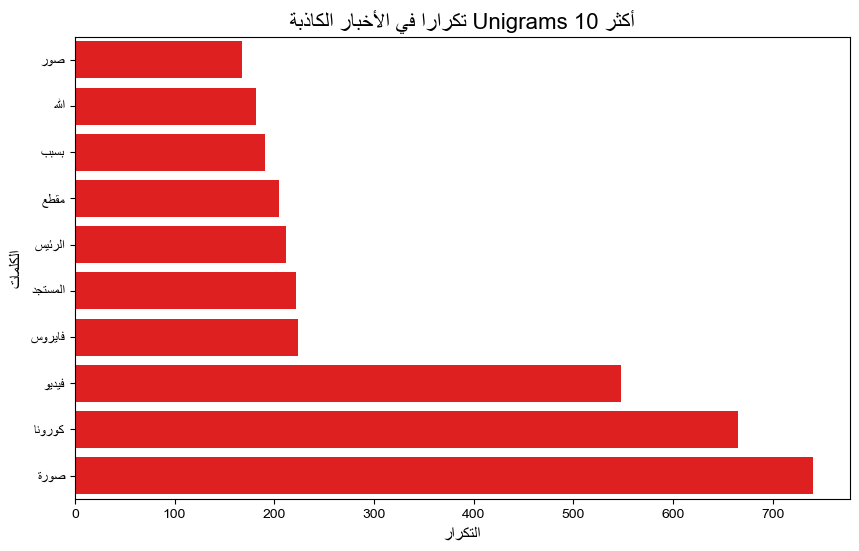

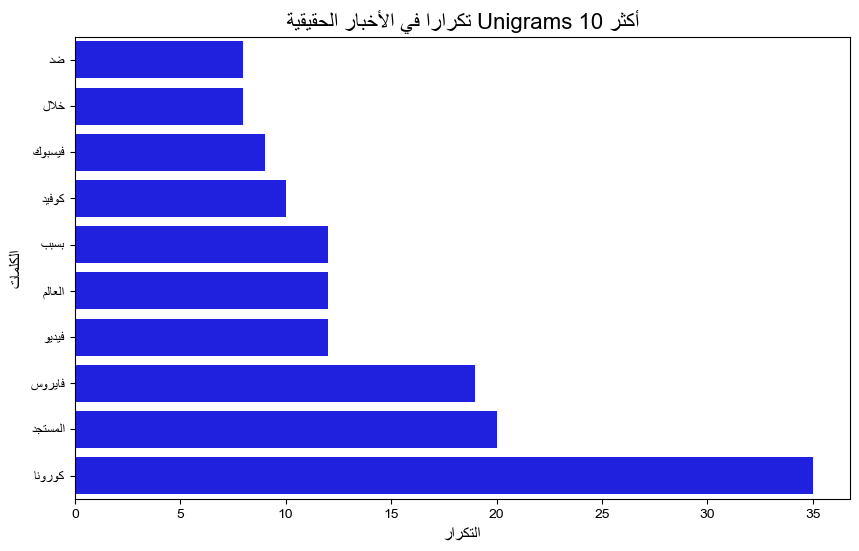

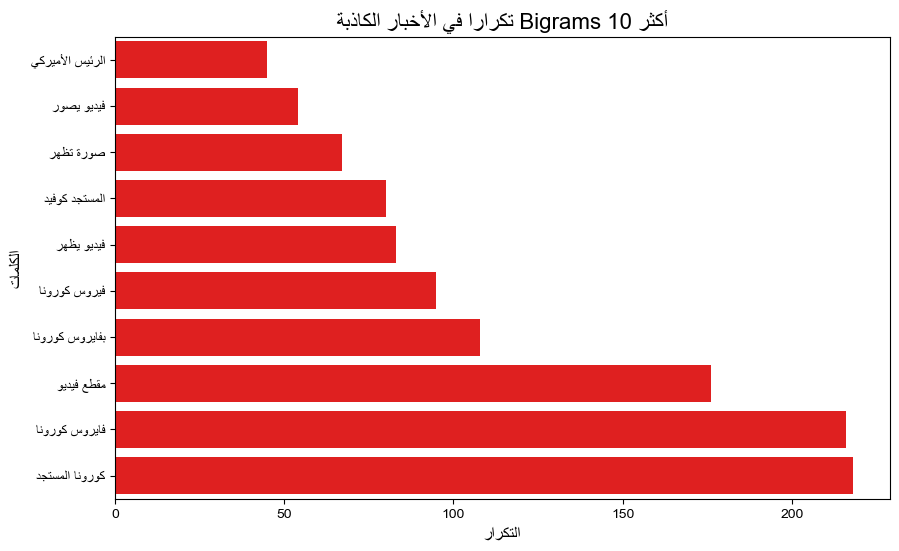

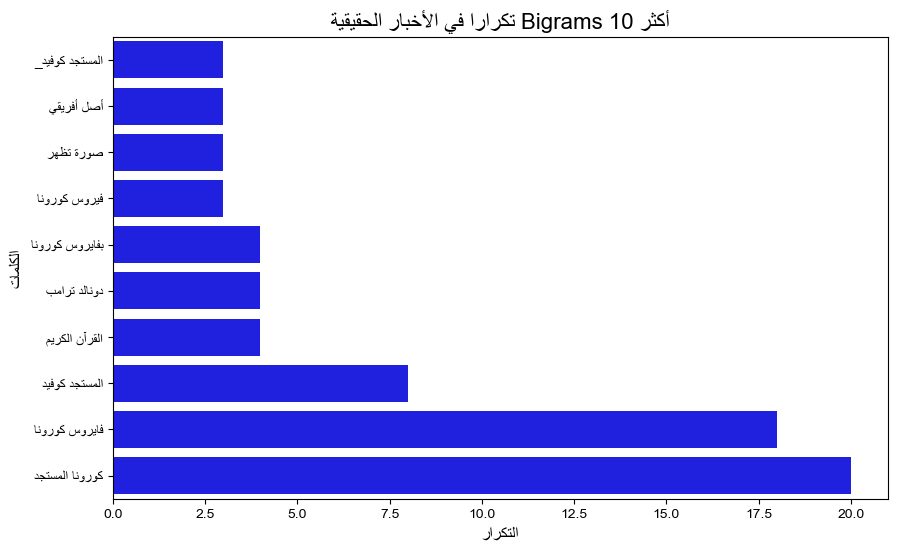

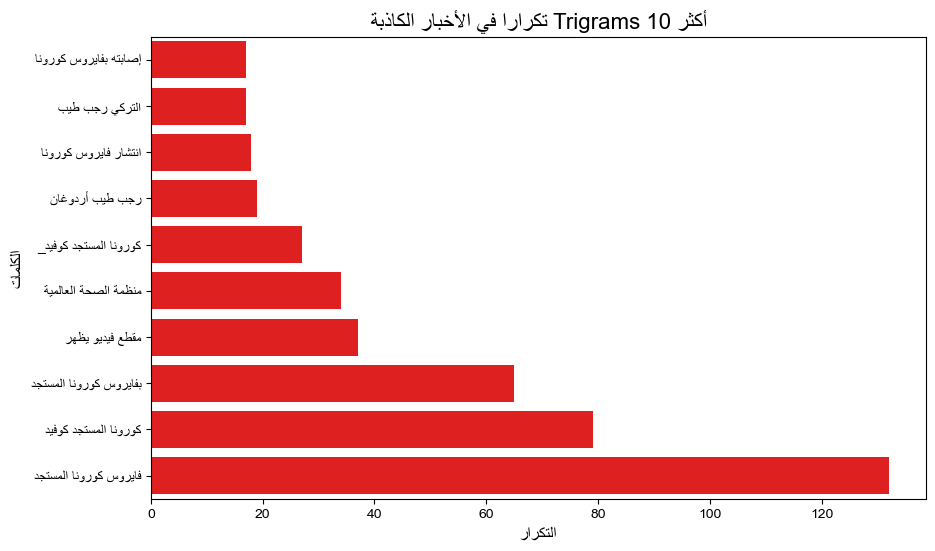

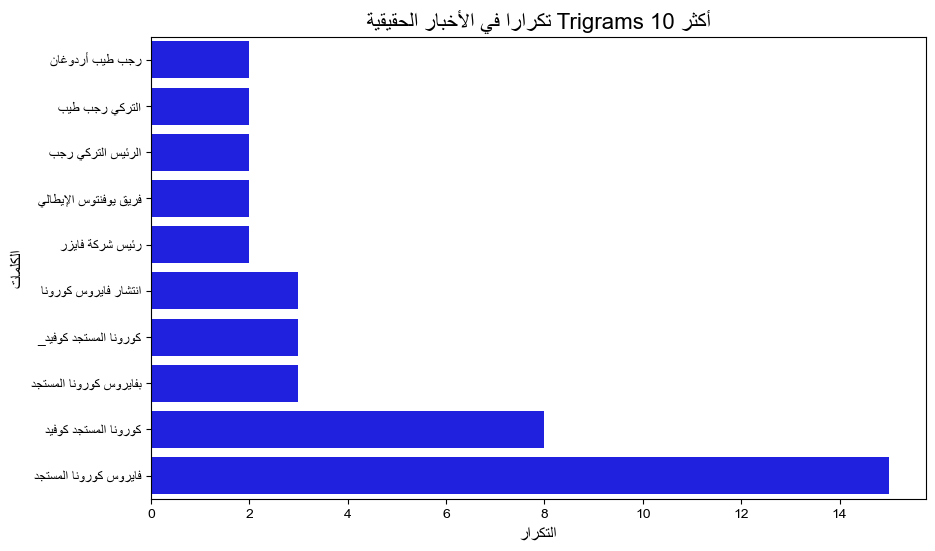

In [142]:
#setting global font to an arabic font
rcParams['font.family'] = 'Arial'

#reshaping arabic text
def reshape_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)  
    return get_display(reshaped_text)

#plotting function with arabic support
def plot_ngrams(ngrams, title, color):
    labels, counts = zip(*ngrams)
    reshaped_labels = [reshape_arabic(' '.join(label)) for label in labels]  
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=reshaped_labels, color=color) 
    plt.title(reshape_arabic(title), fontsize=16)
    plt.xlabel(reshape_arabic("التكرار"), fontsize=12)
    plt.ylabel(reshape_arabic("الكلمات"), fontsize=12)
    plt.gca().invert_yaxis()
    plt.show()

#plotting unigrams
plot_ngrams(top_fake_unigrams, "أكثر 10 Unigrams تكرارًا في الأخبار الكاذبة", "red")
plot_ngrams(top_real_unigrams, "أكثر 10 Unigrams تكرارًا في الأخبار الحقيقية", "blue")

#plotting bigrams
plot_ngrams(top_fake_bigrams, "أكثر 10 Bigrams تكرارًا في الأخبار الكاذبة", "red")
plot_ngrams(top_real_bigrams, "أكثر 10 Bigrams تكرارًا في الأخبار الحقيقية", "blue")

#plotting trigrams
plot_ngrams(top_fake_trigrams, "أكثر 10 Trigrams تكرارًا في الأخبار الكاذبة", "red")
plot_ngrams(top_real_trigrams, "أكثر 10 Trigrams تكرارًا في الأخبار الحقيقية", "blue")

# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Word Clouds:

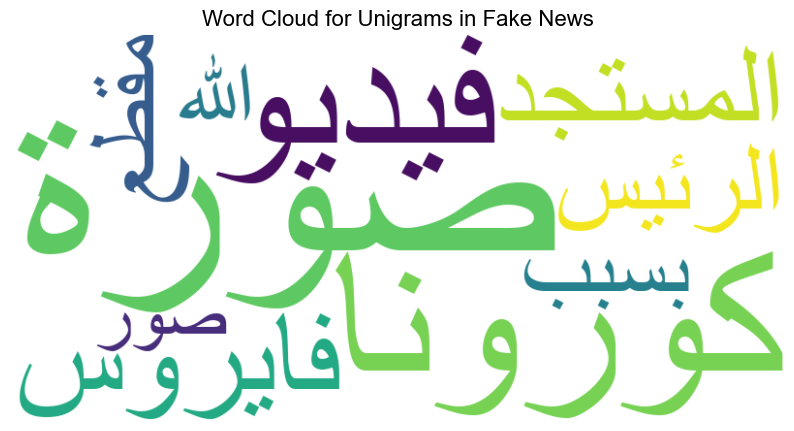

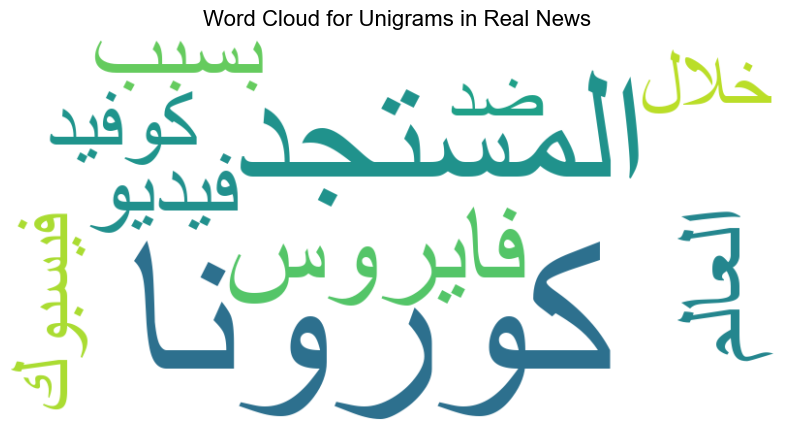

In [144]:
#reshaping arabic text:
def reshape_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)  
    return get_display(reshaped_text) 

#word cloud generation with arabic support:
def generate_wordcloud(ngrams, title):
    word_freq = {reshape_arabic(' '.join(k)): v for k, v in ngrams}
    
    #generating the word cloud:
    wordcloud = WordCloud(
        font_path='C:/Windows/Fonts/arial.ttf', 
        background_color="white",
        width=800,
        height=400,
        colormap="viridis"
    ).generate_from_frequencies(word_freq)
    
    #plotting the word cloud:
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.show()

#generating word clouds for unigrams
generate_wordcloud(top_fake_unigrams, "Word Cloud for Unigrams in Fake News")
generate_wordcloud(top_real_unigrams, "Word Cloud for Unigrams in Real News")

# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# <center> **The End** </center> 

# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ